In [1]:
%matplotlib inline


********************************
Creating Colormaps in Matplotlib
********************************

Matplotlib has a number of built-in colormaps accessible via
`.matplotlib.cm.get_cmap`.  There are also external libraries like
palettable_ that have many extra colormaps.


However, we often want to create or manipulate colormaps in Matplotlib.
This can be done using the class `.ListedColormap` and a Nx4 numpy array of
values between 0 and 1 to represent the RGBA values of the colormap.  There
is also a `.LinearSegmentedColormap` class that allows colormaps to be
specified with a few anchor points defining segments, and linearly
interpolating between the anchor points.

Getting colormaps and accessing their values
============================================

First, getting a named colormap, most of which are listed in
:doc:`/tutorials/colors/colormaps` requires the use of
`.matplotlib.cm.get_cmap`, which returns a
:class:`.matplotlib.colors.ListedColormap` object.  The second argument gives
the size of the list of colors used to define the colormap, and below we
use a modest value of 12 so there are not a lot of values to look at.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
print(viridis)

The object ``viridis`` is a callable, that when passed a float between
0 and 1 returns an RGBA value from the colormap:



In [3]:
print(viridis(0.56))

(0.119512, 0.607464, 0.540218, 1.0)


The list of colors that comprise the colormap can be directly accessed using
the ``colors`` property,
or it can be accessed indirectly by calling  ``viridis`` with an array
of values matching the length of the colormap.  Note that the returned list
is in the form of an RGBA Nx4 array, where N is the length of the colormap.



In [4]:
print('viridis.colors', viridis.colors)
print('viridis(range(12))', viridis(range(12)))
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 12

The colormap is a lookup table, so "oversampling" the colormap returns
nearest-neighbor interpolation (note the repeated colors in the list below)



In [5]:
print('viridis(np.linspace(0, 1, 15))', viridis(np.linspace(0, 1, 15)))

viridis(np.linspace(0, 1, 15)) [[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


Creating listed colormaps
=========================

This is essential the inverse operation of the above where we supply a
Nx4 numpy array with all values between 0 and 1,
to `.ListedColormap` to make a new colormap.  This means that
any numpy operations that we can do on a Nx4 array make carpentry of
new colormaps from existing colormaps quite straight forward.

Suppose we want to make the first 25 entries of a 256-length "viridis"
colormap pink for some reason:



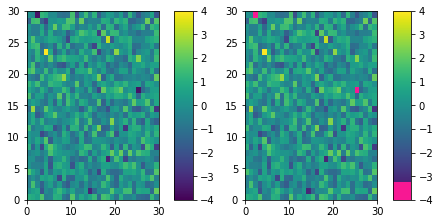

In [6]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

We can easily reduce the dynamic range of a colormap; here we choose the
middle 0.5 of the colormap.  However, we need to interpolate from a larger
colormap, otherwise the new colormap will have repeated values.



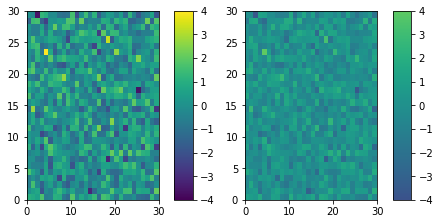

In [7]:
viridisBig = cm.get_cmap('viridis', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
plot_examples([viridis, newcmp])

and we can easily concatenate two colormaps:



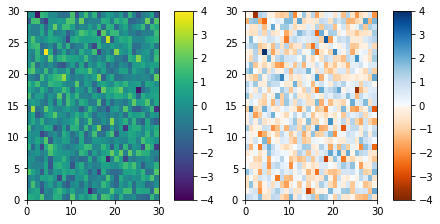

In [8]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

Of course we need not start from a named colormap, we just need to create
the Nx4 array to pass to `.ListedColormap`.  Here we  create a
brown colormap that goes to white....



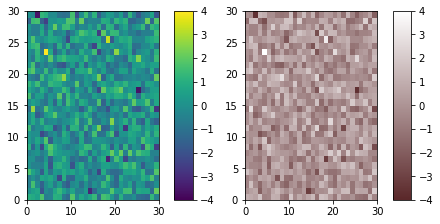

In [9]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(39/256, 1, N)
vals[:, 2] = np.linspace(41/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

Creating linear segmented colormaps
===================================

`.LinearSegmentedColormap` class specifies colormaps using anchor points
between which RGB(A) values are interpolated.

The format to specify these colormaps allows discontinuities at the anchor
points. Each anchor point is specified as a row in a matrix of the
form ``[x[i] yleft[i] yright[i]]``, where ``x[i]`` is the anchor, and
``yleft[i]`` and ``yright[i]`` are the values of the color on either
side of the anchor point.

If there are no discontinuities, then ``yleft[i]=yright[i]``:



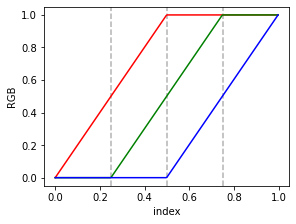

In [10]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

In order to make a discontinuity at an anchor point, the third column is
different than the second.  The matrix for each of "red", "green", "blue",
and optionally "alpha" is set up as::

  cdict['red'] = [...
                  [x[i]      yleft[i]     yright[i]],
                  [x[i+1]    yleft[i+1]   yright[i+1]],
                 ...]

and for values passed to the colormap between ``x[i]`` and ``x[i+1]``,
the interpolation is between ``yright[i]`` and ``yleft[i+1]``.

In the example below there is a discontinuity in red at 0.5.  The
interpolation between 0 and 0.5 goes from 0.3 to 1, and between 0.5 and 1
it goes from 0.9 to 1.  Note that red[0, 1], and red[2, 2] are both
superfluous to the interpolation because red[0, 1] is the value to the
left of 0, and red[2, 2] is the value to the right of 1.0.



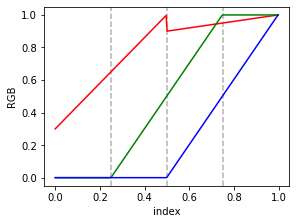

In [11]:
cdict['red'] = [[0.0,  0.0, 0.3],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]
plot_linearmap(cdict)

------------

References
""""""""""

The use of the following functions, methods, classes and modules is shown
in this example:



In [12]:
import matplotlib
matplotlib.axes.Axes.pcolormesh
matplotlib.figure.Figure.colorbar
matplotlib.colors
matplotlib.colors.LinearSegmentedColormap
matplotlib.colors.ListedColormap
matplotlib.cm
matplotlib.cm.get_cmap

<function matplotlib.cm.get_cmap(name=None, lut=None)>